# Coursework 1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs.

You should receive an email at your imperial address inviting you to join the course team on PaperSpace (within a day of the coursework being released).

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook. You can ignore the "tests" folder as it is only required for colab.


#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the /content/ directory (this is the default working directory - you can also change directories with %cd). You may also need to place a copy of the CW ipynb in the /content/ directory. A better option is to mount colab on gdrive and keep the files there (so you only need to do the set up once).

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [2]:
%pip install -q otter-grader pandoc torch torchvision sklearn seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.
        """
      # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Do not initialize weights or biases with torch.empty() but rather use torch.zeros()
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y] 
       
        self.F=out_channels
        self.C=in_channels
        # self.bias=bias
        if bias==True:
            self.b = torch.zeros(out_channels)
        else:
            self.b=None
                    
        # initialize kernal size
        if type(kernel_size) == tuple:
            self.kernel_size=kernel_size
        else:
            self.kernel_size=(kernel_size,kernel_size)

        # initialize stride
        if type(stride) is tuple:
            self.stride=stride
        else:
            self.stride=(stride,stride)

        # initialize padding
        if type(padding) is tuple:
            self.padding=padding
        else:
            self.padding=(padding,padding)  
        
        self.w=torch.zeros(size=(out_channels,in_channels,self.kernel_size[0],self.kernel_size[1]))


    def forward(self, x):
        
        batch_size, input_channels, input_height,input_width = x.shape
        


        conv_width=((input_width-self.kernel_size[1]+2*self.padding[1])//self.stride[1])+1
        conv_height=((input_height-self.kernel_size[0]+2*self.padding[0])//self.stride[0])+1

        out= torch.zeros(batch_size,self.w.shape[0], int(conv_height),int(conv_width))

        inp_unf=F.unfold(x,(self.kernel_size[0],self.kernel_size[1]),stride=(self.stride[0],self.stride[1]),padding=(self.padding[0],self.padding[1]))
        out_unf=inp_unf.transpose(1,2).matmul(self.w.view(self.w.size(0),-1).t()).transpose(1,2)

        if self.b is not None:
            out_unf=out_unf+self.b.view(-1,1)

        out=F.fold(out_unf,(int(conv_height),int(conv_width)),kernel_size=(1,1))
        
#         out2=torch.nn.functional.conv2d(x,self.w,self.b,stride=self.stride,padding=self.padding)


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [5]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.
        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if type(kernel_size)== tuple:
            self.kernel_size = kernel_size
            self.stride = kernel_size
        else:
            self.kernel_size = (kernel_size, kernel_size)
            self.stride = (kernel_size, kernel_size)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # Retrieve x.shape parameters into appropriate variables.
        batch, channels, input_height, input_width = x.shape
        
        # Formula for output dimensions= input_image_size-kernel_size+2*padding/stride +1
        conv_width=((input_width-self.kernel_size[1]+2*0)//self.stride[1])+1
        conv_height=((input_height-self.kernel_size[0]+2*0)//self.stride[0])+1


        unfolded = F.unfold(x,kernel_size=(self.kernel_size[0],self.kernel_size[1]),padding=0,stride=(self.stride[0],self.stride[1]))
        out = unfolded.view(batch,channels,int(unfolded.shape[1]/channels),-1).max(dim=2)[0]
        out = F.fold(out, output_size=(conv_height,conv_width), kernel_size=1)


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [7]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

In [8]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        
        self.in_channels=in_channels
        self.out_channels=out_channels
        
        k = np.sqrt(1 / self.in_channels)

        #weight initialization
        self.w =torch.zeros(in_channels,out_channels)#.uniform_(-k, k)
        
        # Bias Initialize
        if bias==True:
            self.b = torch.zeros(out_channels)#.uniform_(-k, k)
        else:
            self.b = None

      

        
#         *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        
        if self.b is not None:
            out = x @ self.w + self.b
        else:
            out = x@self.w

        

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


        return out




In [9]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

In [36]:
#Fixed the batch norm layer
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: the value used for the running_mean and running_var
        computation. Default: 0.1 . (i.e. 1-momentum for running mean)
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        
        #Gamma will be initialized with channel size equal to the number of features.
        
        self.gamma = torch.ones((1,num_features,1,1))
        
        # Beta will be initializedd with channel size equal to the nimber of features
        self.beta = torch.zeros((1,num_features,1,1))
        
        
        self.running_mean=torch.ones((1,num_features,1,1))
        self.running_var=torch.zeros((1,num_features,1,1))
        
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if self.training:

            mean = torch.mean(x,dim=(0, 2, 3), keepdims=True)
            var = torch.var(x,dim=(0,2,3),keepdim=True,unbiased=False)#((x - mean) ** 2).mean(axis=(0, 2, 3), keepdims=True)
            unbiased_var = torch.var(x, dim=(0, 2, 3), unbiased=True, keepdim=True)
            
            y = (x - mean)/torch.sqrt(var+self.eps)
            output=self.gamma*y+self.beta
            # self.run_mean=self.run_mean*self.momentum +mean.squeeze()*(1-self.momentum)
            # self.run_var=self.run_var*self.momentum +var.squeeze()*(1-self.momentum)
            
            self.running_mean=self.running_mean*(1-self.momentum)+mean*self.momentum
            self.running_var=self.running_var*(1-self.momentum)+unbiased_var*self.momentum


            
        else:

            
            y=(x-self.running_mean)/torch.sqrt(self.running_var+self.eps)       #(x-reshaped_run_mean)/torch.sqrt(reshaped_run_var+self.eps)
            output=self.gamma*y+self.beta

        
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return output



In [37]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [1]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2023-02-03 10:55:25--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1’

NaturalImageNetTrai 100%[===================>]   1.29G   390KB/s    in 60m 37s 

2023-02-03 12:01:56 (371 KB/s) - ‘NaturalImageNetTrain.zip?download=1’ saved [1383630100/1383630100]



In [1]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [10]:
import os
os.getcwd()
!ls
# os.chdir("/datasets/cw1_data")
# os.getcwd()
# !ls
# os.chdir("/")
# os.chdir("/storage/")
# !ls

 NaturalImageNetTest		        dl_cw_1.ipynb
'NaturalImageNetTest.zip?download=1'    model.pt
 NaturalImageNetTrain		        quick_start_pytorch.ipynb
'NaturalImageNetTrain.zip?download=1'   quick_start_pytorch_images
 README.md


In [4]:
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

ON_COLAB=False
mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )

transform_train_1 = transforms.Compose(


            [transforms.Resize(256), 
            transforms.CenterCrop(256),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(10, resample=False, expand=False, center=None, fill=None),

            transforms.ToTensor(), 
            transforms.Normalize(mean.tolist(),std.tolist())
               ]
    )

transform_train_2 = transforms.Compose(

        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.RandomAffine(0, translate=(0, 0.05)),
            transforms.RandomResizedCrop(256,scale=(0.2,0.75)),
            transforms.RandomInvert(),
            transforms.RandomAdjustSharpness(sharpness_factor=2),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]



)

transform_train_3 = transforms.Compose(

        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
            transforms.RandomPerspective(distortion_scale=0.6, p=1.0),

            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]



)


train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

train_dataset_1 = datasets.ImageFolder(train_path, transform=transform)
train_dataset_2 = datasets.ImageFolder(train_path, transform=transform_train_1)
train_dataset_3=datasets.ImageFolder(train_path, transform=transform_train_2)
train_dataset_4=datasets.ImageFolder(train_path, transform=transform_train_3)

train_dataset=train_dataset_1+train_dataset_2+train_dataset_3+train_dataset_4
test_dataset = datasets.ImageFolder(test_path, transform=transform)

# Create train val split
n = len(train_dataset_1)
n_val = int(n/10)

train_set_1,val_set_1=torch.utils.data.random_split(train_dataset_1, [n-n_val, n_val],generator=torch.Generator().manual_seed(rng_seed))
train_set_2,val_set_2=torch.utils.data.random_split(train_dataset_2, [n-n_val, n_val],generator=torch.Generator().manual_seed(rng_seed))
train_set_3,val_set_3=torch.utils.data.random_split(train_dataset_3, [n-n_val, n_val],generator=torch.Generator().manual_seed(rng_seed))
train_set_4,val_set_4=torch.utils.data.random_split(train_dataset_4, [n-n_val, n_val],generator=torch.Generator().manual_seed(rng_seed))

train_set=torch.utils.data.ConcatDataset([train_set_1,train_set_2,train_set_3,train_set_4])
val_set=val_set_1

# train_set, val_set = torch.utils.data.random_split(train_dataset, [n-n_val, n_val])



print(len(train_set), len(val_set), len(test_dataset))


# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
#######################################3
batch_size = 32
#######################################3

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

71944 1998 2000


In [5]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

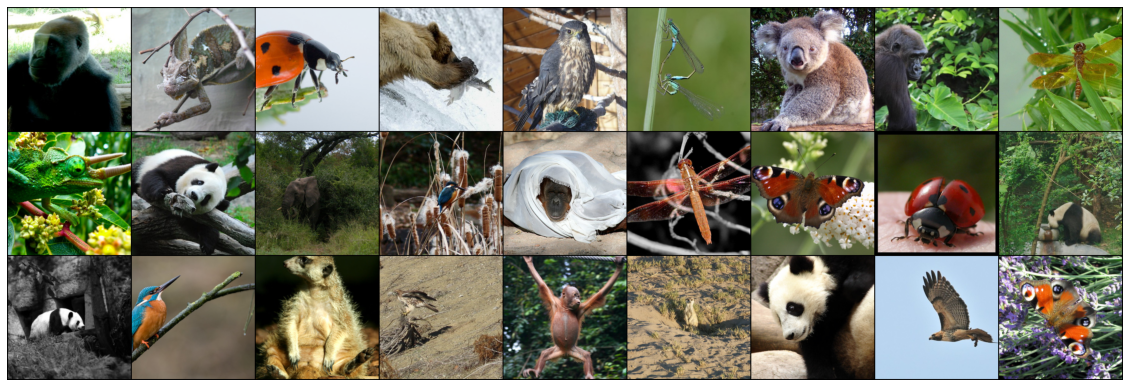

In [22]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [6]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
# define resnet

class ResNet(nn.Module):
    ###################################################
    # Update init input to perform hyper-parameter search methods
    ###################################################
    def __init__(self, ResidualBlock, num_classes = 20):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU())
        
        # self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        # self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.avgpool=nn.AvgPool2d(4)
        self.fc = nn.Linear(512, num_classes)

        ###################################
        # weight_initialize(self.conv1[0].weight)
        # self.drop=nn.Dropout2d(drop_out)
        ###################################
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        # x = self.layer1(x)
        #x = self.drop(x)
        # x = self.layer2(x)
        x=self.maxpool(x)
        #x = self.drop(x)
        x = self.layer1(x)
        #x = self.drop(x)
        x = self.layer2(x)
        #x = self.drop(x)
        x = self.layer3(x)
        #x = self.drop(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
# please do not change the name of this class

def MyResNet():
    return ResNet(ResidualBlock)

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [8]:
USE_GPU = True
dtype = torch.float32 


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
    

print_every = 100
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode

    ########### ADDED ########################
    predictions = torch.tensor([], device=device)
    targets = torch.tensor([], device=device) 
    ##########################################



    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)

            ######## ADDED #################
            predictions = torch.cat((predictions, preds),dim=0) 
            targets = torch.cat((targets, y),dim=0) 
            ################################# 



            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)

        return predictions, targets,float(acc)

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """

    ###########
    milestones = [7, 8,9]

    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.4) 
    accuracy_list = []
    loss_list = []
    ###########


    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
               
               ##############################################
                _, _, accuracy = check_accuracy(loader_val, model)
                accuracy_list.append(accuracy)
                loss_list.append(loss.item())
                ##############################################

                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                print()

        ###############################################################################
        scheduler.step()
        new_learning_rate = scheduler.get_last_lr()
        print("the newest learning rate is:",new_learning_rate)
    return accuracy_list, loss_list
        ###############################################################################
                

cuda:0


# **Training** **network**

In [11]:
# Define and train the network

#####################################################
dropout_rates = [0, 0.01, 0.05, 0.1, 0.2,0.5] # Not effective
learning_rate = [0.1, 0.05, 0.01, 0.005, 0.001]
num_epochs = [5,10,20]
weight_decays=[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
weight_initialize_methods = [nn.init.xavier_uniform_,nn.init.xavier_normal_,nn.init.kaiming_uniform_, nn.init.kaiming_normal_] # not effectiveb
batch_size=[16,32,64,128] # this was manually changed since it cannot be passed into the function

#####################################################

model = MyResNet()
optimizers = [optim.AdamW(model.parameters(),lr = learning_rate[4],weight_decay=weight_decays[0]),optim.Adam(model.parameters(),lr = learning_rate[4]), optim.RMSprop(model.parameters(),lr = learning_rate[4]),
              optim.SGD(model.parameters(),lr = learning_rate[4])]
# Display the total number of parameters to learn
params=0
for p in model.parameters():
  if p.requires_grad:
    params=params+p.numel()
print("Total number of parameters is: {}".format(params))

acc_curve, loss_curve =train_part(model, optimizers[0], num_epochs[1])

# save the model
torch.save(model.state_dict(), 'model.pt')

Total number of parameters is: 11183316
Got 131 / 1998 correct of val set (6.56)
Epoch: 0, Iteration 0, loss = 3.1705

Got 349 / 1998 correct of val set (17.47)
Epoch: 0, Iteration 100, loss = 2.6217

Got 401 / 1998 correct of val set (20.07)
Epoch: 0, Iteration 200, loss = 2.9140

Got 395 / 1998 correct of val set (19.77)
Epoch: 0, Iteration 300, loss = 2.5572

Got 619 / 1998 correct of val set (30.98)
Epoch: 0, Iteration 400, loss = 2.4657

Got 665 / 1998 correct of val set (33.28)
Epoch: 0, Iteration 500, loss = 2.7361

Got 695 / 1998 correct of val set (34.78)
Epoch: 0, Iteration 600, loss = 2.3740

Got 684 / 1998 correct of val set (34.23)
Epoch: 0, Iteration 700, loss = 2.2320

Got 770 / 1998 correct of val set (38.54)
Epoch: 0, Iteration 800, loss = 1.9081

Got 847 / 1998 correct of val set (42.39)
Epoch: 0, Iteration 900, loss = 2.2052

Got 955 / 1998 correct of val set (47.80)
Epoch: 0, Iteration 1000, loss = 1.5928

Got 854 / 1998 correct of val set (42.74)
Epoch: 0, Iteratio

Got 1768 / 1998 correct of val set (88.49)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


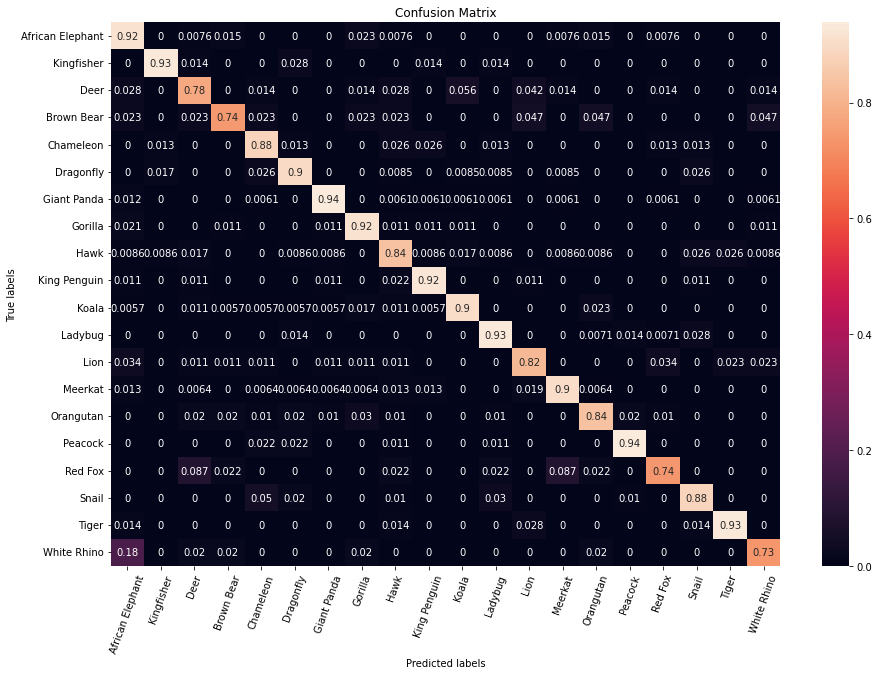

Predicted label ['Brown Bear' 'Tiger']
True label ['Gorilla' 'Hawk']
Corresponding images are shown below


(tensor([ 5., 19.,  2.,  ..., 18., 10.,  0.], device='cuda:0'),
 tensor([ 5.,  6.,  2.,  ...,  8., 10.,  0.], device='cuda:0'),
 0.8848848848848849)

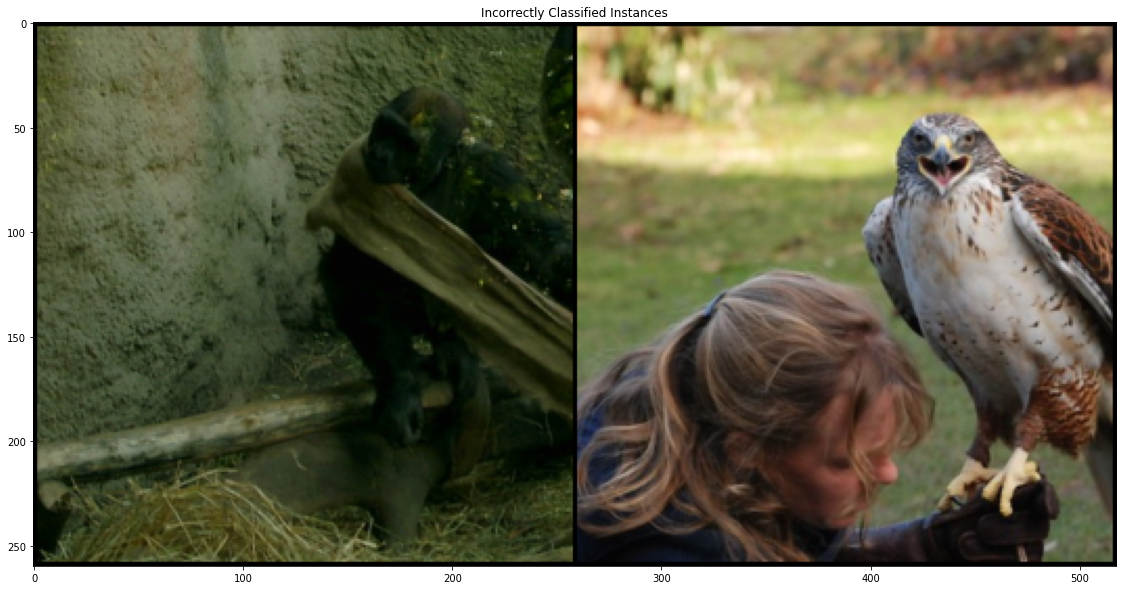

In [16]:
#check accuracy on validation set
check_accuracy(loader_val, model, analysis=True)


In [13]:
torch.save(model.state_dict(), 'model.pt')

# Optimisation strategies

In [18]:
#Random search algorithm
import random
#####################################################
dropout_rates = [0, 0.01, 0.05, 0.1, 0.2,0.5] # Not effective
learning_rate = [0.1, 0.01, 0.001]
num_epochs = [10,20]
weight_decays=[1e-6,1e-4,1e-3]
weight_initialize_methods = [nn.init.xavier_uniform_,nn.init.xavier_normal_,nn.init.kaiming_uniform_, nn.init.kaiming_normal_] # not effectiveb
batch_size=[16,32,64,128] # this was manually changed since it cannot be passed into the function



#####################################################

#Random search algorithm
#Generate random numbers for each hyperparameter
# num=random.randint(0,3)

optimizers = [optim.AdamW(model.parameters(),lr = learning_rate[learning_rate_num],weight_decay=weight_decays[weight_decays_num]),optim.Adam(model.parameters(),lr = learning_rate[learning_rate_num]), optim.RMSprop(model.parameters(),lr = learning_rate[learning_rate_num]),
              optim.SGD(model.parameters(),lr = learning_rate[learning_rate_num])]
for i in range(10):
    optimizers_num=random.randint(0,len(optimizers)-1)
    learning_rate_num=random.randint(0,len(learning_rate)-1)
    num_epochs_num=random.randint(0,len(num_epochs)-1)
    weight_decays_num=random.randint(0,len(weight_decays)-1)
    #There are 18 possible combinations of hyperparameters, but only 10 random numbers are generated

    # store best hyperparameters
    best_acc = 0    


    model = MyResNet()

    
    acc_curve, loss_curve =train_part(model, optimizers[0], num_epochs[num_epochs_num])
    
    if acc_curve[-1] > best_acc:
        best_acc = acc_curve[-1]
        best_learning_rate = learning_rate[learning_rate_num]
        best_weight_decay = weight_decays[weight_decays_num]
        best_optimizer = optimizers[0]
        best_num_epochs = num_epochs[num_epochs_num]

    print("Best accuracy is: {}".format(best_acc))
    print("Best learning rate is: {}".format(best_learning_rate))
    print("Best weight decay is: {}".format(best_weight_decay))
    print("Best optimizer is: {}".format(best_optimizer))
    print("Best number of epochs is: {}".format(best_num_epochs))

Best accuracy is: 86.99
Best learning rate is: 0.001
Best weight decay is: 1e-06
Best optimizer is: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 1e-06
)
Best number of epochs is: 10


<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1773 / 2000 correct of val set (88.65)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


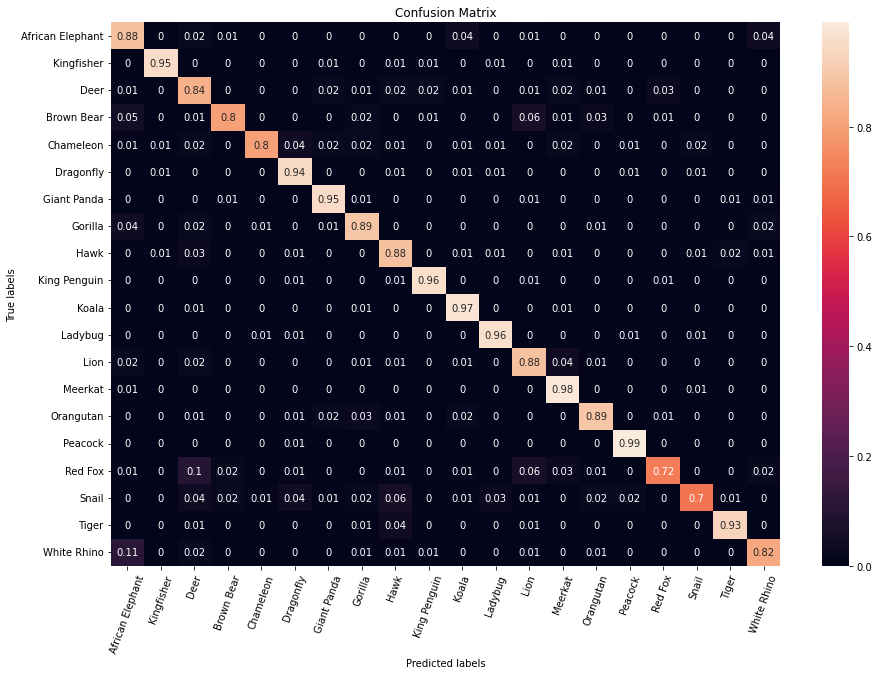

Predicted label ['Hawk' 'Meerkat']
True label ['Deer' 'Red Fox']
Corresponding images are shown below
Got 1773 / 2000 correct of val set (88.65)


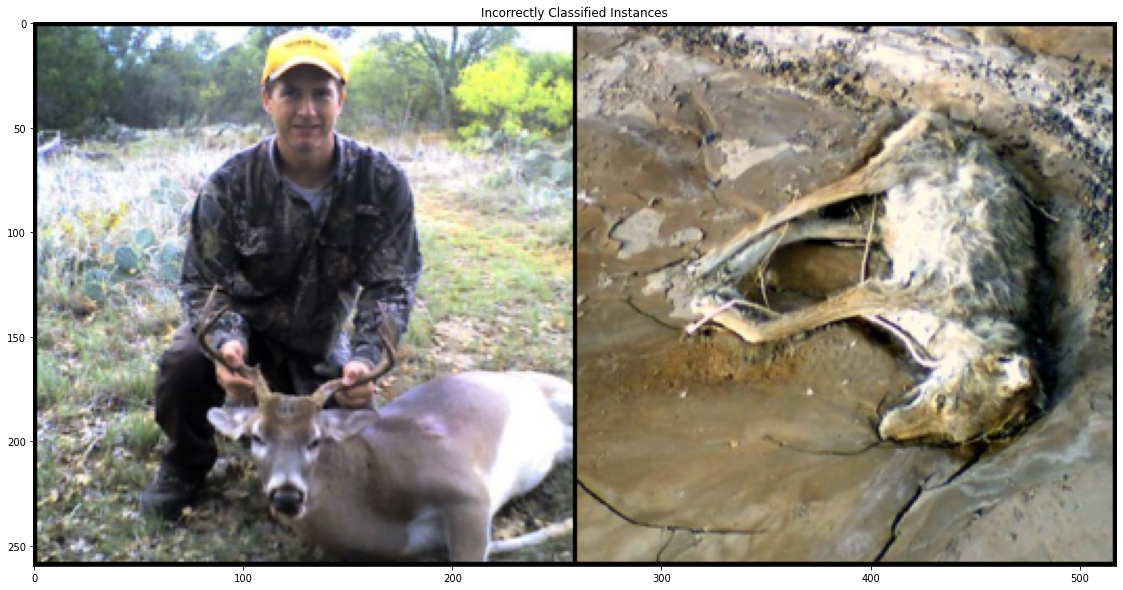

In [15]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)


In [1]:
#Analzying Precision, Recall, F1 score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support 
prec, recall, f1score,_ = precision_recall_fscore_support(targets.cpu(), predictions.cpu())

print('Precision: %.4f' %np.mean(prec*100))
print('Recall: %.4f' %np.mean(recall*100))
print('F1: %.4f' %np.mean(f1score*100))

Precision: 88.4802
Recall: 88.1000
F1: 88.0507


___

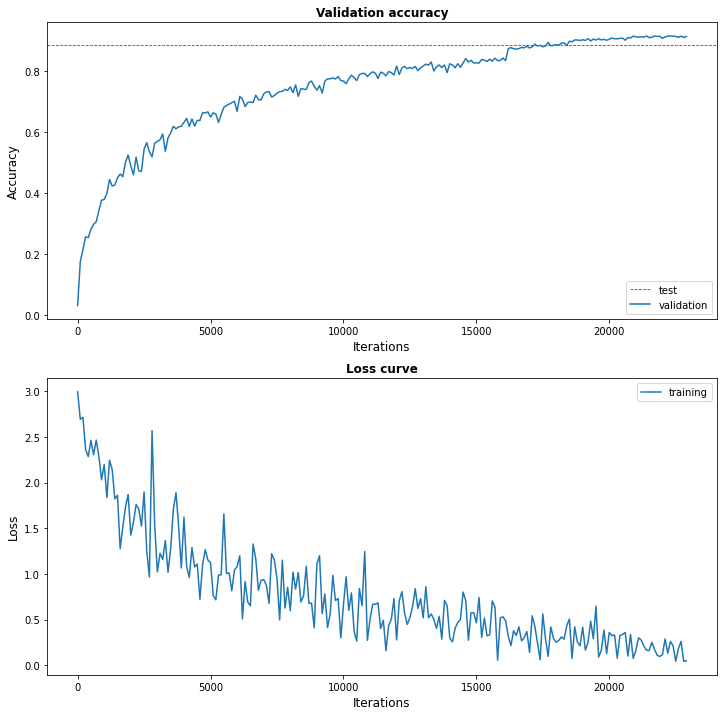

In [33]:
# Visualizations
import matplotlib.pyplot as plt

predictions, targets, acc_test = check_accuracy(loader_test, model)


fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(12)
fig.set_figwidth(12)

# Display test score has a horizontal line.
ax1.axhline(y=acc_test, color='r', linestyle='--', linewidth=0.8, label="test")

# Plot Accuracy
iters = np.linspace(0, 23000 - print_every, int(23000/print_every))
ax1.plot(iters, acc_curve, label="validation")
ax1.set_title('Validation accuracy', fontsize='large', fontweight='bold')
ax1.set_xlabel('Iterations', fontsize='large')
ax1.set_ylabel('Accuracy', fontsize='large')   
ax1.legend()

# Plot Loss
ax2.plot(iters, loss_curve, label="training")
ax2.set_title('Loss curve', fontsize='large', fontweight='bold')
ax2.set_xlabel('Iterations', fontsize='large')
ax2.set_ylabel('Loss', fontsize='large')    
ax2.legend()
plt.show()

Note- The above plot shows the best run achieved by the network. In this run the model achieves an 90% validation accuracy and 89% test accuracy.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

The 5 theoretically applicable hyperparameter tuning strategies are:
1. Grid search
2. Random search
3. Bayesian optimization
4. Nested Cross validation
5. Trial and Error


* Grid search -> is a brute force method but is not a good approach for this particular problem because it is computationally expensive and time consuming. It is also not a good approach for this problem because it is not possible to search over all possible hyperparameters. For example, the number of layers in a neural network is not a hyperparameter that can be searched over. The only upside is that it is easy to implement and it is guaranteed to find the best hyperparameters.

* Random search -> is a good strategy for this problem since it requires less computational power and time than grid search and produces relatively comparable results to grid search. Random search is a better approach in comparision to grid search The downside is that it is not guaranteed to find the best hyperparameters however it is an  efficent method from a time complexity vs accuracy perspective.

* Bayesian optimization -> in theory is a better method for hyperparameter tuning in comparision to grid search and random search. It is a probabilistic approach that uses a Gaussian process to model the hyperparameter space and uses the model to find the best hyperparameters. Bayesian optimization is known to achieve relatively comparable (or better) results than random search while using less training steps. Bayesian optimisation can do this because it accounts for the previous results when choosing the next hyperparameter combination to test.

* Nested cross validation -> is a good method for hyperparameter tuning but is not an efficent methodology for this problem due to the number of parameters that need to be tuned and the size of the dataset. 

* Trial and error -> This is a manual process of sequentially trying different hyperparameter combinations and observing the results. This is not a good method for this problem, because it is time consuming and may not produce the best results. 

From analyzing the pros and cons of each of the above mentioned approaches. Random search and an emperical decision approach were chosen to tune the model hyperparameters. Model tuning began with heuristic values which involved choosing values based on emperical evidence. This was initially done to significantly reduce the search space and compute time for hyperparameter tuning. Thereafter a random search was conducted. Random search was the prefered approach since it is a relatively efficent method for hyperparameter tuning  when accounting for the time limitation of the project vs accuracy achieved by the model. Additionally, it is simple to implement in comparasion to Bayesian optimization. These decisions was made based on the limited time constraint for this course work and limited GPU resources. However, Bayesian optimization would be a better method to use for hyperparameter tuning.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**
The baseline validation accuracy was 36%. The following engineering decisions were made to improve the validation accuracy of the model.


#### 1.  Architecture

The first modification made to the network was to have 64 out channels when making the first layer. Each output channel captures basic features of the image. At the low level layers, the model needs to learn the most basic features of the image. Therefore, having 64 output channels (as apposed to the initial 16 output channels) at the start of the network followed by a pooling layer, allowed more basic features to be captured. More basic features can be captured due to the diversity and abundance of basic features in each image. This as a result, allowed the model to learn more complex features as the network progressed to deeper layers. The pooling layers were used to capture the most important features of the feature maps, while discarding less important information. This process helps to reduce the size of the feature maps while retaining their essential information, making the network more robust to small changes in the input image. This architectural changes were justified and inspired by the Deep Residual Learning for Image Recognition paper by Kaiming, He (2015). In this paper it is shown that all resnet architectures start with an output of 64 channels and includes pooling layers. This modification improved the validation accuracy by ≈ 5-7% (validation accuracy increased from 36% to 41%). 

#### 2.  Data augmentation
Augmentations were applied to the data which generated new instances from the existing data. This artifically boosted the size of the training data. By adding more data to the training set, the model was able to learn more about the data and therefore improved its performance by approx. 29% (validation accuracy increased from approx. 41% to approx. 70%) .When random augmentations were applied, it was identified that the "Deer", "Snail", "Red fox" and "White rhino" classes were the most difficult for the model to classify. From analyzing the images in these classes, it was identified that these classes contained several images where the animal was not the main focus of the image and therefore posed difficultly for the model to classify.

Based on these findings, the augmentations where emperically chosen to improve the models robustness towards these classes. The following augmentations were chosen:

* The first set of augmentations were [RandomResizedCrop, RandomInvert,RandomAffine,RadomAdjustSharpness]. These augmentations were chosen to ensure that the model was not overfitting to the images and was able to generalize images where animals were at different locations in the image. Random invert and Random sharpness improved the model robustness by adding noise. 

* The second set of augmentations were [Random perspective ,GaussianBlur]. Gaussian blur was chosen to account for images of low resolution quality, since the train set did contain low resolution (blurry) images. Random perspective was chosen to account for images where the animal was not the main focus of the image. 

* The third set of augmentations were [RandomHorizontalFlip, RandomRotation]. These augmentations were chosen to add noise and variation to the data.

These 3 sets of augmentations increased the validation accuracy by approx. 10% (validation accuracy increased from approx. 70% to  approx. 80%). It is also important to note that the validation set did not contain any augmentations. This is because the validation set is used to evaluate the models performance on unseen data. Therefore, augmentations were not applied to the validation set to ensure that the model was not overfitting to the augmentations.

#### 3. Optimizer
AdamW was chosen emperically as the prefered optimizer. This is justifed by the paper "Adam: A Method for Stochastic Optimization" by Diederik P. Kingma and Jimmy Ba (2014). In this paper it is shown that Adam is a good optimizer for deep learning models. AdamW was chosen over Adam because it is a variant of Adam that accounts for weight decay. Weight decay was chosen to prevent overfitting. This modification improved the validation accuracy by approx. 3% (validation accuracy increased from approx. 80% to approx. 83%).

#### 4.  Batch size
The batch size was chosen emperically (trial and error). It was noticed that lowering my batch size to 32 produced the highest validation test score. Batch sizes below 32 increased validation test accuracy marginally (<1%) and did not outweigh the significant increase in computational time required to train the model on lower batch sizes. 

### The following hyper parameter values were obtained using random search:

#### 5.  Epochs
#### 6.  Learning rate
#### 7.  Weight decay. 

The Random search produced an epochs=10,learning rate=0.001, and weight decay=1e-6 These hyperparameter values increased the validation accuracy by approx. 4% (validation accuracy increased from approx. 83% to approx. 87%). These values are expected since using a large batch size will create a very sharp loss landscape. This sharp loss landscape is what drops the generalizing ability of the network. Smaller batch sizes create flatter landscapes. This is due to the noise in gradient estimation. The number of epochs of 10 was expected since higher epochs did not show any material increase in the validation accuracy. The weight decay was added to prevent overfitting. N.B, the search space was significantly reduced to minimize optimization time. The search space was limited to heuristic values that are based on literature and rules of thumbs.


#### 8.  Learning rate scheduler.
The learning rate scheduler was chosen to reduce the learning rate as the number of epochs increased. The learning rate was decreased by gamma = 0.4 at epoch 7,8 and 9. These were chosen since towards epochs 7 onwards, smaller learning rates improved convergence to the optimal solution. This modification improved the validation accuracy by approx. 2% (validation accuracy increased from approx. 87% to approx. 89%). 

#### 9.  Drop outs
Dropouts were added to the network after each layer. There was no improvment in the validation accuracy when dropouts were added. This is expected since the model was not overfitting to the training data and the res-net blocks used batch normalization, which ensured sufficent regularisation.

Other engineering decisions such as varying:
* Loss functions
* Weight initialisations
* Activation functions
* Early stopping 
* Gradient clipping
* etc...
..was not done since the validation set accuracy was already well above the baseline model. Therefore there was no need to further improve the model considering the time constraints and the requirements of this assigment being to only improve the baseline model marginally

The above set of engineering modifications increased the validation accuracy to 87-89%. This resulted in a test accuracy of a similar range (87%-89%). This is a good result since the model was able to generalize well to the test data. The loss graph and validation accuracy graph plotted above shows that the model learns well and does not overfit.




---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

The level of abstraction of the feature maps increases as we move from the lower layers to the higher layers.

* The lower level feature maps pick up the minor details of the image. The feature maps at the initial lower layers encode basic features such as edges, vertical, horizontal and contour lines. From analyzing  the low level layers in the below output, it can be seen that the lower level layers extract the edges and contours of the penguin in the image.

* At the mid-level layers, the feature maps pick up more complex features such as shapes, textures and patterns, which are more descriptive of the image as compared to to lower level feature maps.

* At the higher level layers, the feature maps encodes complex patterns which resembles parts of objects in the image, which tend to be a unique trait of that object. In this case, it could be the wing, beak, face etc of the penguin. These higher level layers encode much more abstract patterns that are less interpretable by the human eye. The feature maps at higher levels allows the model to distinguish between objects by presenting features which remain unique to that particular object. This allows the CNN to then accurately classify the input image to its correct class.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

Based on a validation and test accuracy of approx. 87%- 89% respectively, the network does perform sufficently well. The loss graph plotted shows that the model learns efficently since the loss shows a continous downward trend, decreasing to < 0.05 after 10 epochs. There is a high variance in the training loss and this is due to the smaller batch size. The validation and test accuracy is a sufficently good performance considering the base model achieved 38% on the validation set. Additionally the feature maps shows that the model is able to learn the varying degree of complex features of an image at the low to high level layers of the network. 

Although the model achieves a test accuracy score of 88%, there is still potential for improvement, provided resources and time are available.
 - The model can be further improved by using baysian optimization to find better hyperparameter combinations. Grid search may also be implemented which will guarantee the best hyperparameters are found. However this is computationally expensive and time consuming and therefore not advised unless powerful GPU's are available.
 - Accuracy can be further improved by increasing the hyperparameter search space such as:
 * Experimenting with more variations of the number of layers in the network
 * Experimenting with more variations of  filters in each layer
 * Explore more data augmentation strategies to account for annomalies in the dataset (such as the images with multiple objects in them)
 * Explore more optimizers such as RMSProp, Adagrad, Adadelta, Adamax, Nadam, Ftrl
 * Explore more learning rate schedulers such as ReduceLROnPlateau, CyclicLR, OneCycleLR
* Explore more loss functions such as Huber, Poisson, KLDivLoss, BCEWithLogitsLoss, CosineEmbeddingLoss, TripletMarginLoss, HingeEmbeddingLoss, MultiLabelMarginLoss, SmoothL1Loss, PairwiseDistance
* Explore more activation functions such as ELU, SELU, CELU, GELU




---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

Precision, recall and F-1 score can be used to evaluate the performance of the model. Using accuracy as a single performance measure is not ideal since accuracy scores can be misleading if there are uneven class distributions. The confusion matrix is an effective evaluation tool for this particular problem since it visually represents the performance of the model on a per class level. Additionally, a weighted F1 score can be used and compared to the Precision-Recall curve and Reciever operating characteristics curve for various threshold values for further analysis

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [10]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

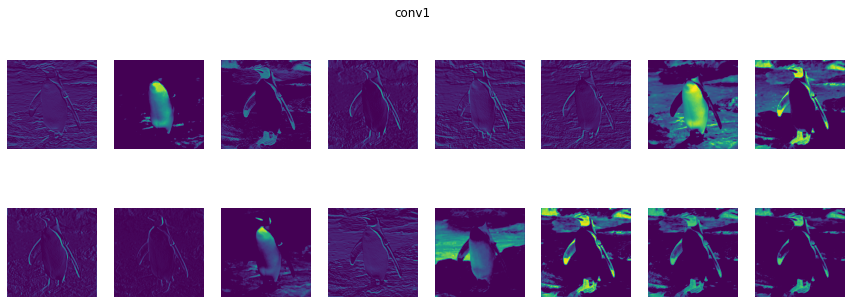

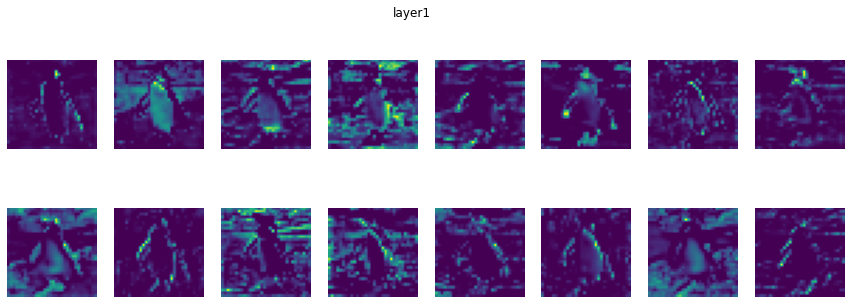

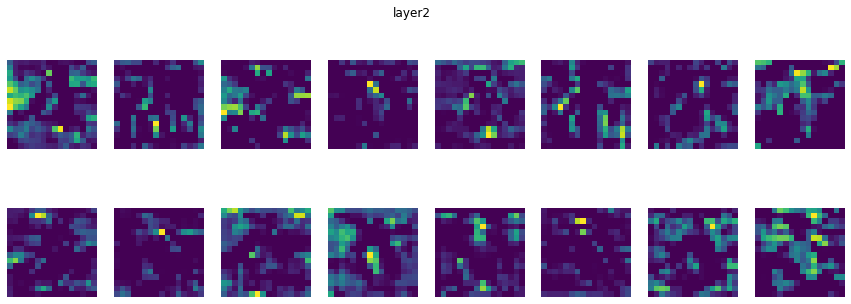

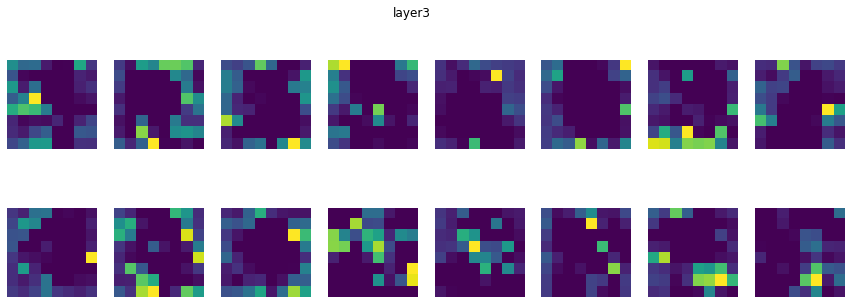

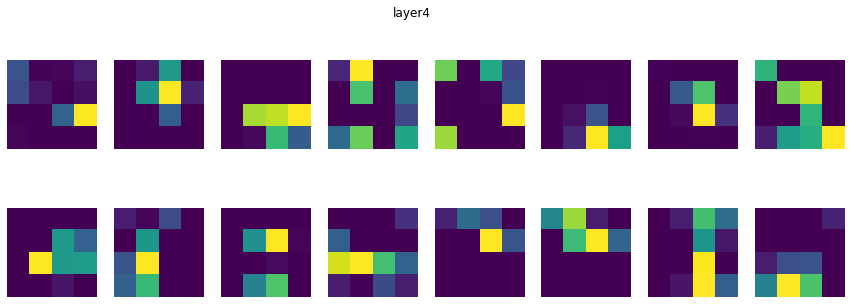

In [11]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [14]:
grader.check_all()

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed